In [2]:
from game import State, random_action
import numpy as np
from tqdm import tqdm


games_history = []

for _ in tqdm(range(10000)):
    history = []
    legal_history = []

    state = State()

    while True:
        if state.is_done():
            break
        else:
            b, w = state.piece_count(state.pieces), state.piece_count(state.enemy_pieces)
            if not state.is_first_player:
                b, w = w, b
            history.append([b, w])
            legal_history.append(len(state.legal_actions()))

        state = state.next(random_action(state))
    
    games_history.append([history, legal_history])

100%|██████████| 10000/10000 [01:55<00:00, 86.49it/s]


In [9]:
# average branching factor_8
h = np.array([game_history[1] for game_history in games_history if len(game_history[1]) == 60])

import pandas as pd

df_8 = pd.DataFrame(h)
df_8.mean()

0      4.000000
1      3.000000
2      4.669648
3      4.366283
4      5.891298
5      5.840055
6      6.724530
7      6.935415
8      7.557611
9      7.851728
10     8.319284
11     8.729533
12     9.030018
13     9.495755
14     9.692996
15    10.124773
16    10.235597
17    10.640237
18    10.726198
19    11.111128
20    11.163432
21    11.436931
22    11.453305
23    11.780776
24    11.675864
25    11.966343
26    11.777138
27    12.017435
28    11.854306
29    12.029109
30    11.805640
31    11.885688
32    11.662674
33    11.675864
34    11.456034
35    11.435719
36    11.152820
37    11.063978
38    10.781231
39    10.612038
40    10.304124
41    10.089448
42     9.656762
43     9.454821
44     8.980898
45     8.727259
46     8.207095
47     7.924045
48     7.326410
49     7.003487
50     6.340358
51     6.003487
52     5.287902
53     4.913432
54     4.162674
55     3.710734
56     2.921468
57     2.399333
58     1.562310
59     1.000000
dtype: float64

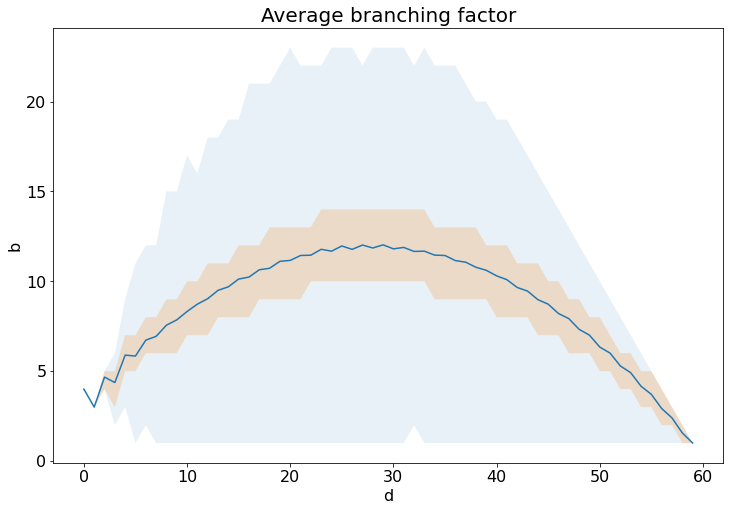

In [4]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.title('Average branching factor', fontsize=20)
plt.xticks(fontsize=16)
plt.xlabel('d', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('b', fontsize=16)
plt.plot(df_8.mean(), label='8x8')
plt.fill_between(range(60), df_8.min(), df_8.max(), alpha=.1)
plt.fill_between(range(60), df_8.quantile(.25), df_8.quantile(.75), alpha=.2)
# plt.legend(fontsize=12)
plt.savefig("avg_b.png",dpi=600)
plt.show()

In [5]:
import numpy as np

cul = [np.log10(4)]

b = [i for i in df_8.mean()]

for i in b[1:]:
    cul.append(i*cul[-1])

len(cul)

60

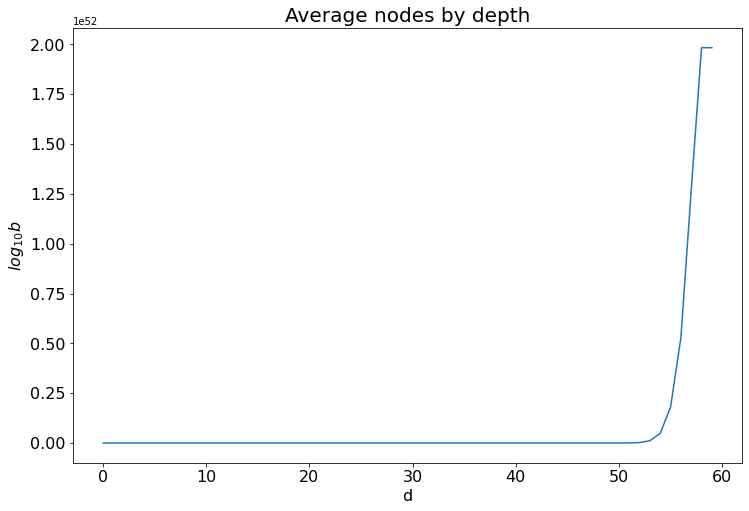

In [6]:

plt.figure(figsize=(12,8))
plt.title('Average nodes by depth', fontsize=20)
plt.xticks(fontsize=16)
plt.xlabel('d', fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('$log_{10}{b}$', fontsize=16)
plt.plot(range(60), cul)
# plt.legend(fontsize=12)
plt.savefig("avg_b_gametree.png",dpi=600)
plt.show()